In [1]:
import sys

import re

import glob

import os

import os.path

import cv2

import random

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import pandas as pd


In [2]:
def read_image(file_path):

    image   = cv2.imread(file_path, cv2.IMREAD_COLOR) 

   
    image = cv2.resize(image, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)

    return image


In [3]:


def make_params(file_path):
    
    basename = os.path.basename(file_path)
    file_number = int(re.sub(r'\D','',basename))
    laser_strength =file_number //30
    
    if 'Al_' in basename :
        df = pd.read_csv(')
        df_Al = df[df["material"] == "Al"]
        Al_array = df_Al.to_numpy()
        matparam = np.delete(Al_array, 0, 1)
    elif 'Cu_' in basename :
        df = pd.read_csv('C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv')
        df_Cu = df[df["material"] == "Cu"]
        Cu_array = df_Cu.to_numpy()
        matparam = np.delete(Cu_array, 0, 1)
    elif 'Fe_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Fe = df[df["material"] == "Fe"]
        Fe_array = df_Fe.to_numpy()
        matparam = np.delete(Fe_array, 0, 1)
    elif 'Ti_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Ti = df[df["material"] == "Ti"]
        Ti_array = df_Ti.to_numpy()
        matparam = np.delete(Ti_array, 0, 1)
    elif 'Ni_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Ni = df[df["material"] == "Ni"]
        Ni_array = df_Ni.to_numpy()
        matparam = np.delete(Ni_array, 0, 1)
    elif 'Zn_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Zn = df[df["material"] == "Zn"]
        Zn_array = df_Zn.to_numpy()
        matparam = np.delete(Zn_array, 0, 1)
    elif 'Zr_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Zr = df[df["material"] == "Zr"]
        Zr_array = df_Zr.to_numpy()
        matparam = np.delete(Zr_array, 0, 1)
    elif 'Nb_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Nb = df[df["material"] == "Nb"]
        Nb_array = df_Nb.to_numpy()
        matparam = np.delete(Nb_array, 0, 1)
    elif 'Mo_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Mo = df[df["material"] == "Mo"]
        Mo_array = df_Mo.to_numpy()
        matparam = np.delete(Mo_array, 0, 1)
    elif 'Ag_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Ag = df[df["material"] == "Ag"]
        Ag_array = df_Ag.to_numpy()
        matparam = np.delete(Ag_array, 0, 1)
    elif 'Sn_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Sn = df[df["material"] == "Sn"]
        Sn_array = df_Sn.to_numpy()
        matparam = np.delete(Sn_array, 0, 1)
    elif 'Pb_' in basename :
        df = pd.read_csv("C:\Konika\Konika Research\Program\ExperimentalMaterial\Sample data\Narai san\materials\soturon.csv")
        df_Pd = df[df["material"] == "Pb"]
        Pd_array = df_Pd.to_numpy()
        matparam = np.delete(Pd_array, 0, 1)
    else :
        print(file_path)
    
    params = np.empty(0)
    
    
    params = np.append(matparam, laser_strength)
    
    return params


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 66-67: malformed \N character escape (816026555.py, line 63)

In [5]:
def preprocess(images):

    count = len(images)

    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype = np.uint8)



    for i, image_file in enumerate(images):

        image = read_image(image_file)
    
        image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        params = make_params(image_file)
        
        numar = np.empty([16, COLS, ROWS])
        
        for j in range(0, 16):
            
            numar[j] = np.full((COLS, ROWS), params[j])
        
        
       
        image_rgb_b = np.concatenate([image_rgb.transpose(2, 0, 1), numar],axis=0)
        
        #image_rgb = np.append(image_rgb.T, np.array([numar]), axis=0)
        
        data[i] = image_rgb_b.T
        
    

    data = data.astype('float32')

    data = data/255.0



    return data


# Import Library for CNN

In [6]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical


# Model Initializer

In [7]:
def Material_model():



    model = Sequential()

    model.add(Conv2D(2, kernel_size=(5, 5), activation='relu', kernel_initializer='he_normal', input_shape=(ROWS, COLS, CHANNELS)))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', kernel_initializer='he_normal'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))

    model.add(Dropout(0.2))


    model.add(Dense(2, kernel_initializer='he_normal'))

    model.add(Dense(2, activation='softmax'))

    model.summary()

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])



    return model



In [8]:
ROWS = 42

COLS = 72

CHANNELS = 19


train_inputdirectory =r'C:\Users\konik\OneDrive\Desktop\Konika Research\Narai san\materials\train'

test_inputdirectory = r'C:\Users\konik\OneDrive\Desktop\Konika Research\Narai san\materials\test'




In [9]:
Da_train = glob.glob(train_inputdirectory + "/Damaged/*.jpg")

Un_train = glob.glob(train_inputdirectory + "/Undamaged/*.jpg")


train_images = Da_train + Un_train

random.shuffle(train_images)

In [27]:
len(train_images)

9000

In [10]:
train_labels = []

for i in train_images:

    if 'Da_' in i :

        train_labels.append(0)

    if 'Un_' in i :

        train_labels.append(1)


In [11]:
Da_test = glob.glob(test_inputdirectory + "/Damaged/*.jpg")

Un_test = glob.glob(test_inputdirectory + "/Undamaged/*.jpg")



test_images = Da_test + Un_test

random.shuffle(test_images)



#正解ラベルのリスト作成

test_labels = []

for i in test_images:

    if 'Da_' in i :

        test_labels.append(0)

    if 'Un_' in i :

        test_labels.append(1)



In [2]:
#test_images

In [12]:
train_data = preprocess(train_images)

test_data = preprocess(test_images)

In [29]:
train_data.shape

(9000, 42, 72, 19)

In [1]:
#for i in range(len(test_images)):

 #   print(test_images[i])

 #   print(test_labels[i])


In [14]:
#One hot Encoder
train_labels = utils.to_categorical(train_labels,2)

test_labels = utils.to_categorical(test_labels,2)


In [15]:
optimizer = 'adam'

objective = 'categorical_crossentropy'

model = Material_model()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 68, 2)         952       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 34, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 30, 64)        3264      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 64)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6720)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [16]:


epochs = 50

batch_size = 150



early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')


history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1, shuffle=True, callbacks=[early_stopping])


Epoch 1/50
48/48 [==============================] - 10s 202ms/step - loss: 0.6339 - accuracy: 0.6338 - val_loss: 0.4795 - val_accuracy: 0.7894
Epoch 2/50
48/48 [==============================] - 10s 216ms/step - loss: 0.3744 - accuracy: 0.8957 - val_loss: 0.3480 - val_accuracy: 0.9072
Epoch 3/50
48/48 [==============================] - 10s 201ms/step - loss: 0.3193 - accuracy: 0.9221 - val_loss: 0.2981 - val_accuracy: 0.9272
Epoch 4/50
48/48 [==============================] - 10s 200ms/step - loss: 0.2887 - accuracy: 0.9250 - val_loss: 0.2721 - val_accuracy: 0.9256
Epoch 5/50
48/48 [==============================] - 10s 213ms/step - loss: 0.2195 - accuracy: 0.9557 - val_loss: 0.1865 - val_accuracy: 0.9656
Epoch 6/50
48/48 [==============================] - 11s 232ms/step - loss: 0.1681 - accuracy: 0.9685 - val_loss: 0.1542 - val_accuracy: 0.9633
Epoch 7/50
48/48 [==============================] - 10s 215ms/step - loss: 0.1467 - accuracy: 0.9624 - val_loss: 0.1267 - val_accuracy: 0.9672

In [17]:
predictions = model.predict(test_data, verbose=1)


141/141 [==============================] - 2s 17ms/step


In [18]:
predictions

array([[9.9987674e-01, 1.2329097e-04],
       [9.6970587e-04, 9.9903035e-01],
       [1.0000000e+00, 3.2638789e-27],
       ...,
       [9.9999976e-01, 2.8677476e-07],
       [9.9480009e-01, 5.1998752e-03],
       [9.9998736e-01, 1.2615389e-05]], dtype=float32)

In [20]:
score = model.evaluate(test_data, test_labels, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])




141/141 [==============================] - 2s 16ms/step - loss: 3.7703 - accuracy: 0.7322
Test loss: 3.7702724933624268
Test accuracy: 0.7322221994400024


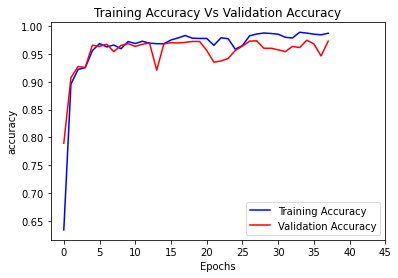

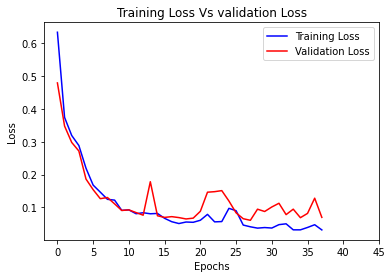

In [22]:
#accuracy

plt.xlabel('Epochs')

plt.ylabel('accuracy')

plt.title('Training Accuracy Vs Validation Accuracy')

plt.plot(history.history['accuracy'], 'blue', label='Training Accuracy')

plt.plot(history.history['val_accuracy'], 'red', label='Validation Accuracy')

plt.xticks(range(0,epochs)[0::5])

plt.legend()

plt.show()



#loss

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Training Loss Vs validation Loss')

plt.plot(history.history['loss'], 'blue', label='Training Loss')

plt.plot(history.history['val_loss'], 'red', label='Validation Loss')

plt.xticks(range(0,epochs)[0::5])

plt.legend()

plt.show()


